# Pendahuluan

Dalam industri kebugaran, memahami dan memitigasi churn pelanggan adalah hal yang sangat penting pada pertumbuhan dan profitabilitas yang berkelanjutan. 

Analisis akan dilakukan menggunakan data dari perusahaan Model Fitness. Pada data ini akan dilakukan analisis komprehensif yang bertujuan untuk memprediksi kemungkinan churn pada bulan mendatang, mengelompokkan pengguna berdasarkan karakteristik utama, mengidentifikasi faktor-faktor yang mempengaruhi churn, dan pada akhirnya memberikan rekomendasi untuk meningkatkan layanan pelanggan dari informasi berharga yang diperoleh.


# Inisialisasi

In [1]:
# Memuat library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram



In [2]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Lebar kolom max
pd.set_option('display.max_colwidth', None)

# Memuat Data

In [3]:
try :
    df = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 12\File\gym_churn_us.csv')

except :
    df = pd.read_csv('/datasets/gym_churn_us.csv')

# Memeriksa dan Memperbaiki Data

## Memeriksa Data

In [4]:
# Memeriksa data
na = df.isna().sum().sum()
dup = df.duplicated().sum()

print('Data memiliki baris dan kolom :', df.shape)
print()
if na > 0 :
    print('Data memiliki nilai yang hilang pada :')
    print(df.isna().sum())
else :
    print('Tidak terdapat nilai yang hilang dalam data.')
print()
if dup > 0 :
    print('Data memiliki duplikat eksplisit sebanyak :', dup, 'Baris')
else :
    print('Tidak terdapat duplikat eksplisit dalam data.')

Data memiliki baris dan kolom : (4000, 14)

Tidak terdapat nilai yang hilang dalam data.

Tidak terdapat duplikat eksplisit dalam data.


In [5]:
# Deskripsi umum data
df.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Tidak terdapat nilai yang mencurigakan pada data.

In [6]:
# Sample data
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Tampaknya sebagian besar data dalam kolom merupakan bilangan binary, 0 = false dan 1 = true.

In [7]:
# Informasi umum data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Data pada kolom `Contract_period, Age, Avg_additional_charges_total, Month_to_end_contract, Avg_class_frequency_total` dan `Avg_class_frequency_current_month` bukan bilangan binary.

**Informasi yang terdapat pada data :**

 1. `gender` — Jenis kelamin pengguna. 0 = perempuan, 1 = laki-laki.
 2. `Near_Location` — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran. 0 = jauh, 1 = dekat.
 3. `Partner` — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka). 0 = bukan mitra, 1 = mitra.
 4. `Promo_friends` — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka). 0 = tidak, 1 = ya.
 5. `Phone` — apakah pengguna memberikan nomor telepon mereka. 0 = tidak, 1 = ya.
 6. `Contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 12 bulan (1 tahun).
 7. `Group_visits` — apakah pengguna mengambil bagian dalam sesi kelompok. 0 = tidak, 1 = ya.
 8. `Age` — Umur pengguna.
 9. `Avg_additional_charges_total` — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.
 10. `Month_to_end_contract` — sisa bulan sebelum kontrak berakhir.
 11. `Lifetime` — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran.
 12. `Avg_class_frequency_total` — frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan.
 13. `Avg_class_frequency_current_month` — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan.
 14. `Churn` — churn aktual untuk bulan terkait. 0 = tinggal, 1 = keluar.


**Masalah yang terdapat pada data :**

 1. Penulisan nama kolom tidak seragam.

## Memperbaiki Data

In [8]:
# Merubah nama kolom menjadi lowercase
df.columns = df.columns.str.lower()

# Cek perubahan nama kolom
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Nama kolom sudah berubah menjadi lowercase.

## Kesimpulan

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Secara keseluruhan data memiliki 14 kolom dan 4.000 baris.

Tidak terdapat nilai yang hilang dan duplikat eksplisit dalam data.

**Informasi yang terdapat dalam data :**

 1. `gender` — Jenis kelamin pengguna. 0 = perempuan, 1 = laki-laki.
 2. `near_location` — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran. 0 = jauh, 1 = dekat.
 3. `partner` — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka). 0 = bukan mitra, 1 = mitra.
 4. `promo_friends` — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka). 0 = tidak, 1 = ya.
 5. `phone` — apakah pengguna memberikan nomor telepon mereka. 0 = tidak, 1 = ya.
 6. `contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 12 bulan (1 tahun).
 7. `group_visits` — apakah pengguna mengambil bagian dalam sesi kelompok. 0 = tidak, 1 = ya.
 8. `age` — Umur pengguna.
 9. `avg_additional_charges_total` — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.
 10. `month_to_end_contract` — sisa bulan sebelum kontrak berakhir.
 11. `lifetime` — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran.
 12. `avg_class_frequency_total` — frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan.
 13. `avg_class_frequency_current_month` — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan.
 14. `churn` — churn aktual untuk bulan terkait. 0 = tinggal, 1 = keluar.
 
**Perbaikan yang dilakukan pada data :**

 1. Merubah nama kolom menjadi lowercase.




# Exploratory Data Analysis (EDA)

## Nilai Rata-rata dan Standar Deviasi Fitur Secara Keseluruhan

In [10]:
# Menampilkan mean dan std dengan .describe()
df.describe().loc[['mean','std']].T

,mean,std
gender,0.510250,0.499957
near_location,0.845250,0.361711
partner,0.486750,0.499887
promo_friends,0.308500,0.461932
phone,0.903500,0.295313
contract_period,4.681250,4.549706
group_visits,0.412250,0.492301
age,29.184250,3.258367
avg_additional_charges_total,146.943728,96.355602
month_to_end_contract,4.322750,4.191297


 **Nilai rata-rata dan standar deviasi secara keseluruhan menunjukan :**
 
 1. `gender` ;
    1. mean (0,51) : 51% pengguna berjenis kelamin laki-laki dan 49% perempuan.
    2. std (0,50) : gender terdistribusi dengan merata.
 2. `near_location` ;
    1. mean (0,84) : 84% pengguna berlokasi dekat dengan pusat kebugaran.
    2. std (0,36) : terdapat variabilitas, namun kebanyakan pengguna berlokasi dekat.
 3. `partner` ;
    1. mean (0,48) : 48% pengguna merupakan karyawan perusahaan mitra.
    2. std (0,50) : jumlah pengguna karyawan perusahaan mitra terdistribusi dengan merata.
 4. `promo_friends` ;
    1. mean (0,31) : 31% pengguna bergabung melalui program ajak teman.
    2. std (0,46) : terdapat variabilitas pada jumlah pengguna dengan program promo friends.
 5. `phone` ;
    1. mean (0,90) : 90% pengguna memberikan nomor telepon nya.
    2. std (0,29) : terdapat sedikit variabilitas, sebagian besar pengguna memberikan nomor telepon nya.
 6. `contract_period` ;
    1. mean (4,68) : rata-rata masa kontrak pengguna 4,68 bulan.
    2. std (4,55) : terdapat variabilitas pada masa kontrak.
 7. `group_visits` ;
    1. mean (0,41) : 41% pengguna mengambil sesi kelompok.
    2. std (0,49) : terdapat variabilitas pada jumlah pengguna yang mengambil sesi kelompok.
 8. `age` ;
    1. mean (29,18) : rata-rata umur pengguna 29 tahun.
    2. std (3,25) : terdapat variabilitas pada umur pengguna.
 9. `avg_additional_charges_total` ;
    1. mean (146,94) : rata-rata biaya tambahan diluar biaya berlangganan pengguna sebesar 146,94.
    2. std (96,35) : terdapat variabilitas yang cukup tinggi pada biaya tambahan pengguna.
 10. `month_to_end_contract`;
     1. mean (4,32) : rata-rata umur sisa kontrak pengguna 4,32 bulan.
     2. std (4,19) : terdapat variabilitas pada umur sisa kontrak pengguna.
 11. `lifetime` ;
     1. mean (3,72) : rata-rata waktu kunjungan pengguna 3,72 bulan.
     2. std (3,74) : terdapat variabilitas pada waktu kunjungan pengguna.
 12. `avg_class_frequency_total` ;
     1. mean (1,87) : rata-rata kunjungan per minggu pengguna 1,87 kali.
     2. std (0,97) : terdapat variabilitas pada kunjungan per minggu pengguna.
 13. `avg_class_frequency_current_month` ;
     1. mean (1,76) : rata-rata kunjungan per bulan pengguna 1,76 kali.
     2. std (1,05) : terdapat variabilitas pada kunjungan per bulan pengguna.
 14. `churn` :
     1. mean (0,26) :  26% pengguna keluar dari program.
     2. std (0,44) : terdapat variabilitas pada churn.

## Nilai Rata-rata Fitur Kelompok

In [11]:
# Membandingkan nilai rata-rata berdasarkan kelompok churn
df.pivot_table(columns = 'churn', aggfunc='mean')

churn,0,1
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
avg_class_frequency_current_month,2.027882,1.044546
avg_class_frequency_total,2.024876,1.474995
contract_period,5.747193,1.728558
gender,0.510037,0.510839
group_visits,0.464103,0.268615
lifetime,4.711807,0.990575
month_to_end_contract,5.283089,1.662582
near_location,0.873086,0.768143


**Perbandingan nilai rata-rata kelompok churn yang bertahan (0) dan keluar (1) :**
 
 1. `age` : rata-rata umur pengguna yang keluar lebih rendah.
 2. `avg_additional_charges_total` : rata-rata biaya tambahan pengguna yang keluar lebih rendah.
 3. `avg_class_frequency_current_month` : rata-rata kunjungan per bulan pengguna yang keluar lebih rendah.
 4. `avg_class_frequency_total` : rata-rata kunjungan per minggu pengguna yang keluar lebih rendah.
 5. `contract_period` : rata-rata umur kontrak pengguna yang keluar lebih singkat.
 6. `gender` : tidak terdapat perbedaan yang signifikan pada proporsi jenis kelamin pengguna.
 7. `group_visits` : pengguna yang keluar mengambil lebih sedikit sesi kelompok.
 8. `lifetime` : rata-rata kunjungan pengguna yang keluar lebih singkat.
 9. `month_to_end_contract` : rata-rata waktu sisa kontrak pengguna yang keluar lebih rendah.
 10. `near_location` : rata-rata lokasi pengguna yang keluar lebih jauh.
 11. `partner` : rata-rata pengguna merupakan karyawan perusahaan mitra lebih sedikit.
 12. `phone` : tidak terdapat perbedaan yang signifikan pada proporsi pengguna memberikan nomor telepon nya.
 13. `promo_friends` : rata-rata pengguna bergabung dengan program promo friends yang keluar lebih sedikit.
 
 

## Distribusi Fitur Kelompok

**Distribusi fitur kelompok pengguna yang bertahan. (churn = 0)**

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'near_location'}>,
        <Axes: title={'center': 'partner'}>,
        <Axes: title={'center': 'promo_friends'}>],
       [<Axes: title={'center': 'phone'}>,
        <Axes: title={'center': 'contract_period'}>,
        <Axes: title={'center': 'group_visits'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'avg_additional_charges_total'}>,
        <Axes: title={'center': 'month_to_end_contract'}>,
        <Axes: title={'center': 'lifetime'}>,
        <Axes: title={'center': 'avg_class_frequency_total'}>],
       [<Axes: title={'center': 'avg_class_frequency_current_month'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

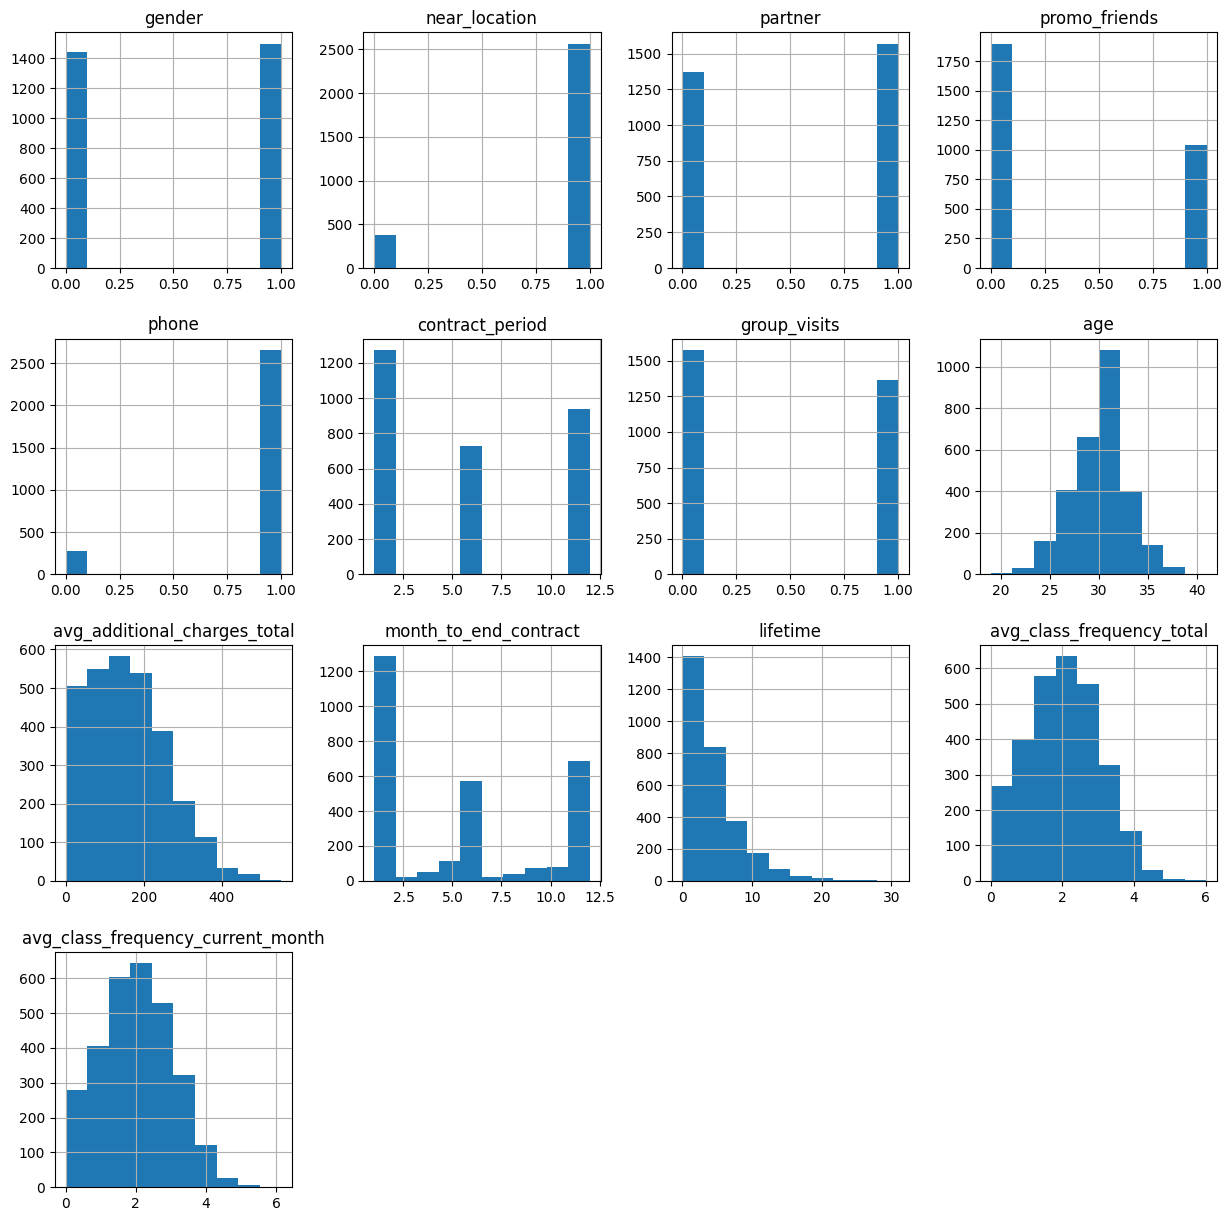

In [12]:
# Mengelompokan data
churn_df = df.query('churn == 1')
stay_df = df.query('churn == 0')

# Grafik histogram fitur pengguna yang bertahan
stay_df.drop(columns=['churn']).hist(figsize=(15,15))

**Distribusi data pada kelompok yang bertahan (churn = 0) :**

 1. `gender` : jenis kelamin lebih banyak laki-laki, namun perbedaanya tidak signifikan.
 2. `near_location` : pengguna dengan lokasi yang dekat lebih banyak.
 3. `partner` : pengguna yang merupakan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tanpa program promo friends lebih banyak.
 5. `phone` : pengguna yang memberikan nomor teleponya lebih banyak.
 6. `contract_period` : kebanyakan usia kontrak pengguna 1 dan 12 bulan. 
 7. `group_visits` : kebanyakan pengguna tidak mengambil sesi kelompok.
 8. `age` : kebanyakan usia pengguna 26 - 33 tahun.
 9. `avg_additional_charges_total` : biaya tambahan yang dibelanjakan oleh pengguna pada rentang 0-200.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 dan 12 bulan.
 11. `lifetime` : kebanyakan waktu kunjungan pengguna 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan pengguna berkunjung 1 - 3 kali per minggu.
 13. `avg_class_frequency_current_month` : kebanyakan pengguna berkunjung 1 - 3 kali per bulan.

**Distribusi fitur kelompok pengguna yang keluar. (churn = 1)**

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'near_location'}>,
        <Axes: title={'center': 'partner'}>,
        <Axes: title={'center': 'promo_friends'}>],
       [<Axes: title={'center': 'phone'}>,
        <Axes: title={'center': 'contract_period'}>,
        <Axes: title={'center': 'group_visits'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'avg_additional_charges_total'}>,
        <Axes: title={'center': 'month_to_end_contract'}>,
        <Axes: title={'center': 'lifetime'}>,
        <Axes: title={'center': 'avg_class_frequency_total'}>],
       [<Axes: title={'center': 'avg_class_frequency_current_month'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

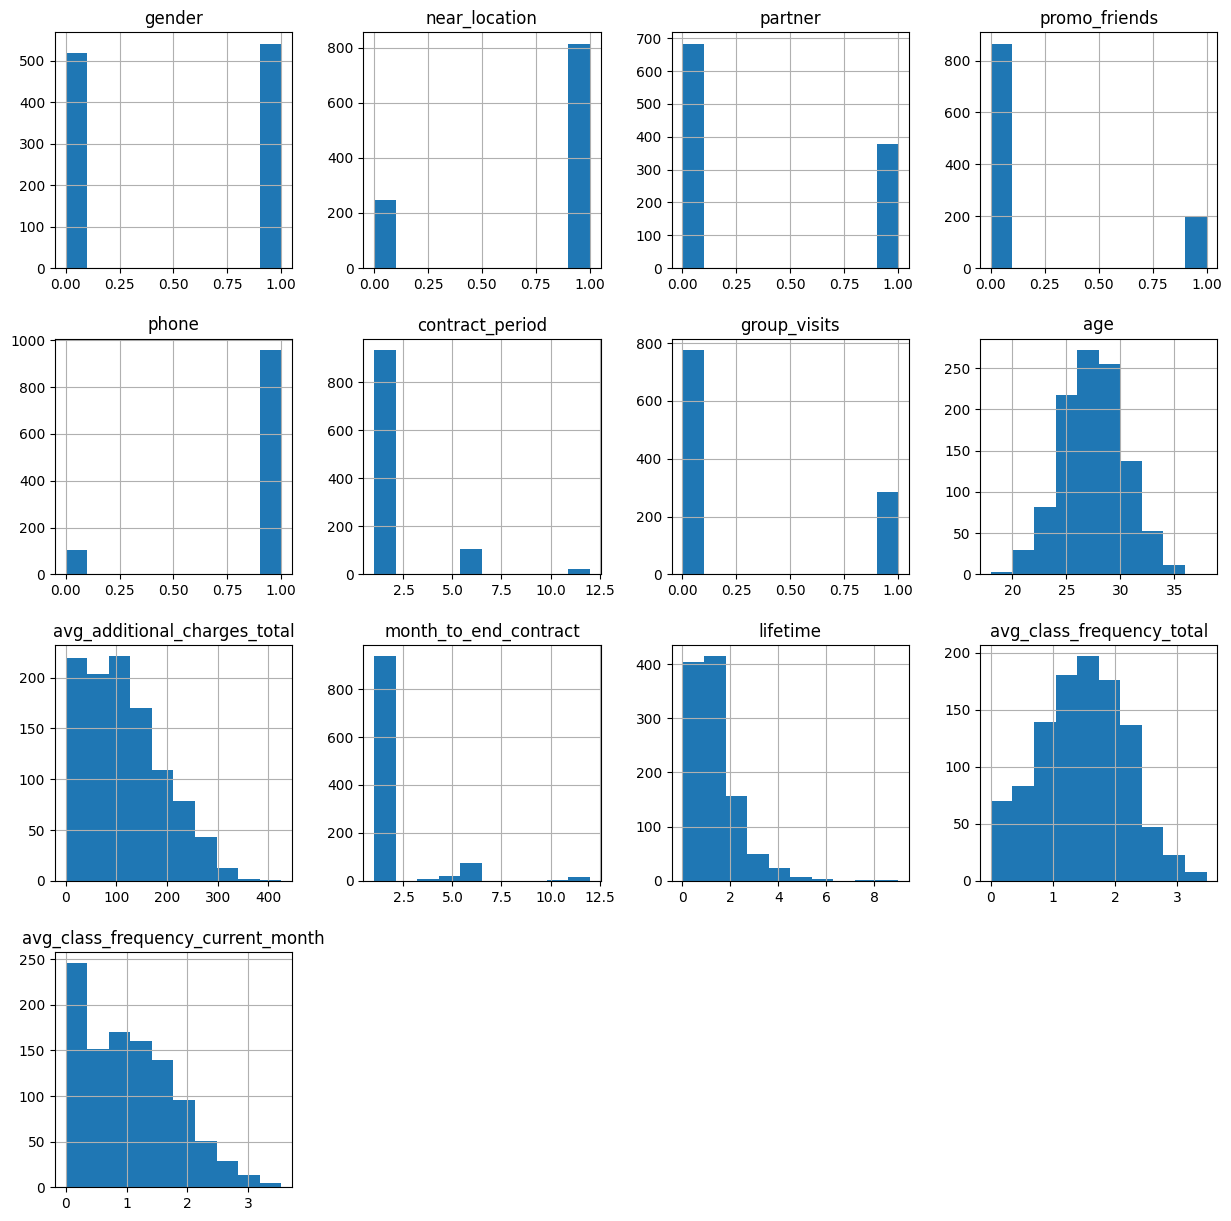

In [13]:
# Grafik histogram fitur pengguna yang keluar
churn_df.drop(columns=['churn']).hist(figsize=(15,15))

**Distribusi data pada kelompok yang keluar (churn = 1) :**

 1. `gender` : jenis kelamin lebih banyak laki-laki, namun perbedaanya tidak signifikan.
 2. `near_location` : pengguna dengan lokasi yang dekat lebih banyak.
 3. `partner` : pengguna yang bukan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tanpa program promo friends lebih banyak.
 5. `phone` : pengguna yang memberikan nomor teleponya lebih banyak.
 6. `contract_period` : usia kontrak pengguna 1 bulan paling banyak. 
 7. `group_visits` : kebanyakan pengguna tidak mengambil sesi kelompok.
 8. `age` : kebanyakan usia pengguna 25 - 29 tahun.
 9. `avg_additional_charges_total` : biaya tambahan yang dibelanjakan oleh pengguna pada rentang 0-100 
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1.
 11. `lifetime` : kebanyakan waktu kunjungan pengguna 0-1 bulan.
 12. `avg_class_frequency_total` : kebanyakan pengguna berkunjung 1 - 2 kali per minggu.
 13. `avg_class_frequency_current_month` : kebanyakan pengguna berkunjung 1 - 1,5 kali per bulan.
 

## Matriks Korelasi

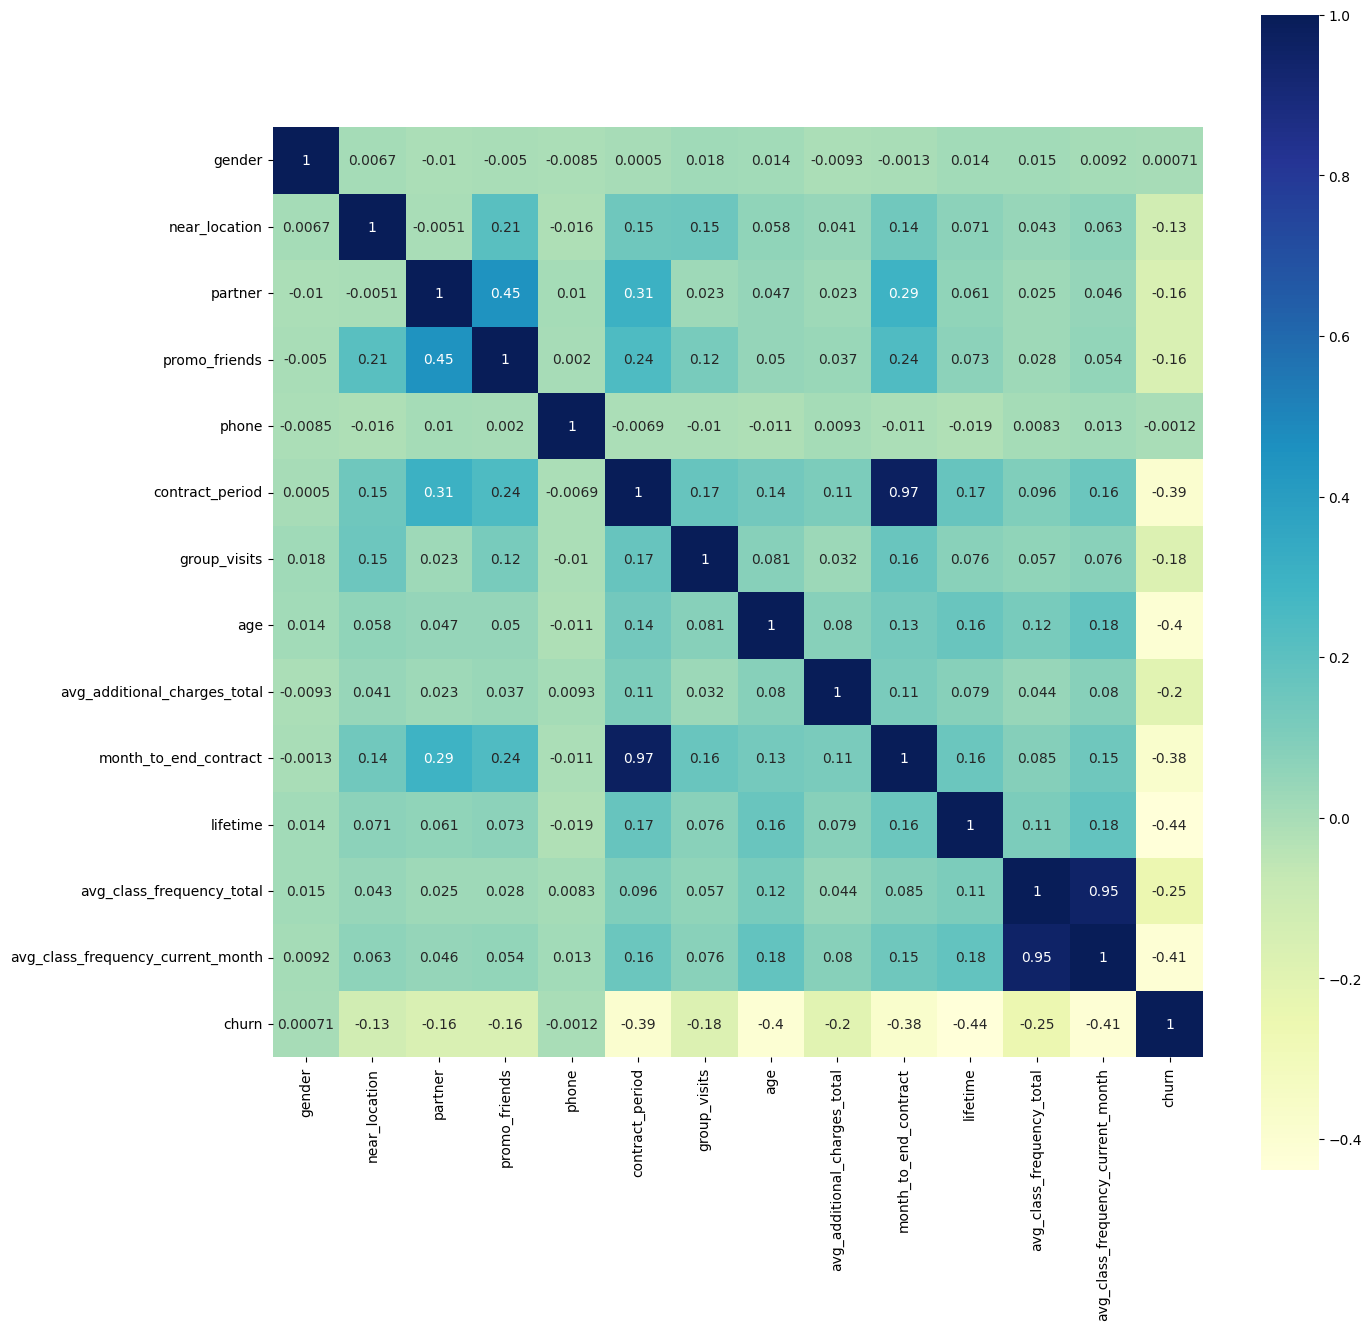

In [14]:
# Membuat matriks korelasi
cm = df.corr()

# Grafik heatmap
plt.figure(figsize=(15,15))

sns.heatmap(cm, annot=True, square=True, cmap='YlGnBu')

plt.show()


Tampaknya fitur berkorelasi negatif terhadap `churn`.

**Fitur yang berkorelasi terhadap `churn` :**

 1. `lifetime` (-0,44) : pengguna yang menjadi anggota lebih lama memiliki kemungkinan lebih kecil untuk keluar.
 2. `avg_class_frequency_current_month` (-0,41) dan `avg_class_frequency_total` (-0,25) : pengguna yang lebih sering berkunjung memiliki kemungkinan lebih kecil untuk keluar.
 3. `age` (-0,40) : pengguna yang lebih tua memiliki kemungkinan lebih kecil untuk keluar.
 4. `contract_period` (-0,39) dan `month_to_end_contract` (-0,38) : pengguna yang memiliki umur kontrak dan sisa umur kontrak yang panjang memiliki kemungkinan lebih kecil untuk keluar.
 5. `avg_additional_charges_total` (-0,20) : pengguna yang mengeluarkan lebih banyak biaya tambahan memiliki kemungkinan lebih kecil untuk keluar.


## Kesimpulan

 **Nilai rata-rata dan standar deviasi secara keseluruhan menunjukan :**
 
 1. `gender` ;
    1. mean (0,51) : 51% pengguna berjenis kelamin laki-laki dan 49% perempuan.
    2. std (0,50) : gender terdistribusi dengan merata.
 2. `near_location` ;
    1. mean (0,84) : 84% pengguna berlokasi dekat dengan pusat kebugaran.
    2. std (0,36) : terdapat variabilitas, namun kebanyakan pengguna berlokasi dekat.
 3. `partner` ;
    1. mean (0,48) : 48% pengguna merupakan karyawan perusahaan mitra.
    2. std (0,50) : jumlah pengguna karyawan perusahaan mitra terdistribusi dengan merata.
 4. `promo_friends` ;
    1. mean (0,31) : 31% pengguna bergabung melalui program ajak teman.
    2. std (0,46) : terdapat variabilitas pada jumlah pengguna dengan program promo friends.
 5. `phone` ;
    1. mean (0,90) : 90% pengguna memberikan nomor telepon nya.
    2. std (0,29) : terdapat sedikit variabilitas, sebagian besar pengguna memberikan nomor telepon nya.
 6. `contract_period` ;
    1. mean (4,68) : rata-rata masa kontrak pengguna 4,68 bulan.
    2. std (4,55) : terdapat variabilitas pada masa kontrak.
 7. `group_visits` ;
    1. mean (0,41) : 41% pengguna mengambil sesi kelompok.
    2. std (0,49) : terdapat variabilitas pada jumlah pengguna yang mengambil sesi kelompok.
 8. `age` ;
    1. mean (29,18) : rata-rata umur pengguna 29 tahun.
    2. std (3,25) : terdapat variabilitas pada umur pengguna.
 9. `avg_additional_charges_total` ;
    1. mean (146,94) : rata-rata biaya tambahan diluar biaya berlangganan pengguna sebesar 146,94.
    2. std (96,35) : terdapat variabilitas yang cukup tinggi pada biaya tambahan pengguna.
 10. `month_to_end_contract`;
     1. mean (4,32) : rata-rata umur sisa kontrak pengguna 4,32 bulan.
     2. std (4,19) : terdapat variabilitas pada umur sisa kontrak pengguna.
 11. `lifetime` ;
     1. mean (3,72) : rata-rata waktu kunjungan pengguna 3,72 bulan.
     2. std (3,74) : terdapat variabilitas pada waktu kunjungan pengguna.
 12. `avg_class_frequency_total` ;
     1. mean (1,87) : rata-rata kunjungan per minggu pengguna 1,87 kali.
     2. std (0,97) : terdapat variabilitas pada kunjungan per minggu pengguna.
 13. `avg_class_frequency_current_month` ;
     1. mean (1,76) : rata-rata kunjungan per bulan pengguna 1,76 kali.
     2. std (1,05) : terdapat variabilitas pada kunjungan per bulan pengguna.
 14. `churn` :
     1. mean (0,26) :  26% pengguna keluar dari program.
     2. std (0,44) : terdapat variabilitas pada churn.

**Perbandingan nilai rata-rata kelompok churn yang bertahan (0) dan keluar (1) :**
 
 1. `age` : rata-rata umur pengguna yang keluar lebih rendah.
 2. `avg_additional_charges_total` : rata-rata biaya tambahan pengguna yang keluar lebih rendah.
 3. `avg_class_frequency_current_month` : rata-rata kunjungan per bulan pengguna yang keluar lebih rendah.
 4. `avg_class_frequency_total` : rata-rata kunjungan per minggu pengguna yang keluar lebih rendah.
 5. `contract_period` : rata-rata umur kontrak pengguna yang keluar lebih singkat.
 6. `gender` : tidak terdapat perbedaan yang signifikan pada proporsi jenis kelamin pengguna.
 7. `group_visits` : pengguna yang keluar mengambil lebih sedikit sesi kelompok.
 8. `lifetime` : rata-rata kunjungan pengguna yang keluar lebih singkat.
 9. `month_to_end_contract` : rata-rata waktu sisa kontrak pengguna yang keluar lebih rendah.
 10. `near_location` : rata-rata lokasi pengguna yang keluar lebih jauh.
 11. `partner` : rata-rata pengguna merupakan karyawan perusahaan mitra lebih sedikit.
 12. `phone` : tidak terdapat perbedaan yang signifikan pada proporsi pengguna memberikan nomor telepon nya.
 13. `promo_friends` : rata-rata pengguna bergabung dengan program promo friends yang keluar lebih sedikit.
 
 

**Distribusi data pada kelompok yang bertahan (churn = 0) :**

 1. `gender` : jenis kelamin lebih banyak laki-laki, namun perbedaanya tidak signifikan.
 2. `near_location` : pengguna dengan lokasi yang dekat lebih banyak.
 3. `partner` : pengguna yang merupakan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tanpa program promo friends lebih banyak.
 5. `phone` : pengguna yang memberikan nomor teleponya lebih banyak.
 6. `contract_period` : kebanyakan usia kontrak pengguna 1 dan 12 bulan. 
 7. `group_visits` : kebanyakan pengguna tidak mengambil sesi kelompok.
 8. `age` : kebanyakan usia pengguna 26 - 33 tahun.
 9. `avg_additional_charges_total` : biaya tambahan yang dibelanjakan oleh pengguna pada rentang 0-200.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 dan 12 bulan.
 11. `lifetime` : kebanyakan waktu kunjungan pengguna 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan pengguna berkunjung 1 - 3 kali per minggu.
 13. `avg_class_frequency_current_month` : kebanyakan pengguna berkunjung 1 - 3 kali per bulan.

**Distribusi data pada kelompok yang keluar (churn = 1) :**

 1. `gender` : jenis kelamin lebih banyak laki-laki, namun perbedaanya tidak signifikan.
 2. `near_location` : pengguna dengan lokasi yang dekat lebih banyak.
 3. `partner` : pengguna yang bukan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tanpa program promo friends lebih banyak.
 5. `phone` : pengguna yang memberikan nomor teleponya lebih banyak.
 6. `contract_period` : usia kontrak pengguna 1 bulan paling banyak. 
 7. `group_visits` : kebanyakan pengguna tidak mengambil sesi kelompok.
 8. `age` : kebanyakan usia pengguna 25 - 29 tahun.
 9. `avg_additional_charges_total` : biaya tambahan yang dibelanjakan oleh pengguna pada rentang 0-100 
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 bulan.
 11. `lifetime` : kebanyakan waktu kunjungan pengguna 0-1 bulan.
 12. `avg_class_frequency_total` : kebanyakan pengguna berkunjung 1 - 2 kali per minggu.
 13. `avg_class_frequency_current_month` : kebanyakan pengguna berkunjung 1 - 1,5 kali per bulan.
 

**Fitur yang berkorelasi terhadap `churn` :**

 1. `lifetime` (-0,44) : pengguna yang menjadi anggota lebih lama memiliki kemungkinan lebih kecil untuk keluar.
 2. `avg_class_frequency_current_month` (-0,41) dan `avg_class_frequency_total` (-0,25) : pengguna yang lebih sering berkunjung memiliki kemungkinan lebih kecil untuk keluar.
 3. `age` (-0,40) : pengguna yang lebih tua memiliki kemungkinan lebih kecil untuk keluar.
 4. `contract_period` (-0,39) dan `month_to_end_contract` (-0,38) : pengguna yang memiliki umur kontrak dan sisa umur kontrak yang panjang memiliki kemungkinan lebih kecil untuk keluar.
 5. `avg_additional_charges_total` (-0,20) : pengguna yang mengeluarkan lebih banyak biaya tambahan memiliki kemungkinan lebih kecil untuk keluar.


# Model dan Prediksi Churn Pengguna

Membagi data menjadi train_set (80%) dan validation_set (20%), persentase ini diambil berdasarkan praktek umum analisa data.

In [15]:
# Data fitur (matriks X) dan variabel target (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# Training dan test data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)

# Algoritme model
model = [LogisticRegression(random_state=0, max_iter=1000), RandomForestClassifier(random_state=0)]


In [16]:
# Fungsi menghitung semua metrik
def all_metrics(m, X_train, X_validation, y_train, y_validation):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    y_prob = model.predict_proba(X_validation)[:,1]
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_validation, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_validation, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_validation, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_validation, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_validation, y_prob)))  

In [17]:
# Menampilkan semua metrik
for i in model :
    print(i)
    all_metrics(i, X_train, X_validation, y_train, y_validation)

LogisticRegression(max_iter=1000, random_state=0)
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
RandomForestClassifier(random_state=0)
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


Pada kedua model machine learning memiliki skor Accuracy dan ROC_AUC yang sama. Tetapi model Logistic Regression memiliki skor Precision, Recall dan F1 sedikit lebih tinggi dari Random Forrest Classifier. Berdasarkan dengan skor ini, model Logistic Regression bekerja sedikit lebih baik dari Random Forest Classifier.

# Klaster Pengguna

In [18]:
# Standardisasi data 
scaler = StandardScaler()

# Menerapkan standardisasi
X_st = scaler.fit_transform(X)

Menerapkan standardisasi pada kolom fitur.

In [19]:
# Membuat linkage matrix
linkage_matrix = linkage(X_st, method='ward')

Membuat matriks jarak pada fitur yang telah distandardisasi.

**Grafik Dendrogram**

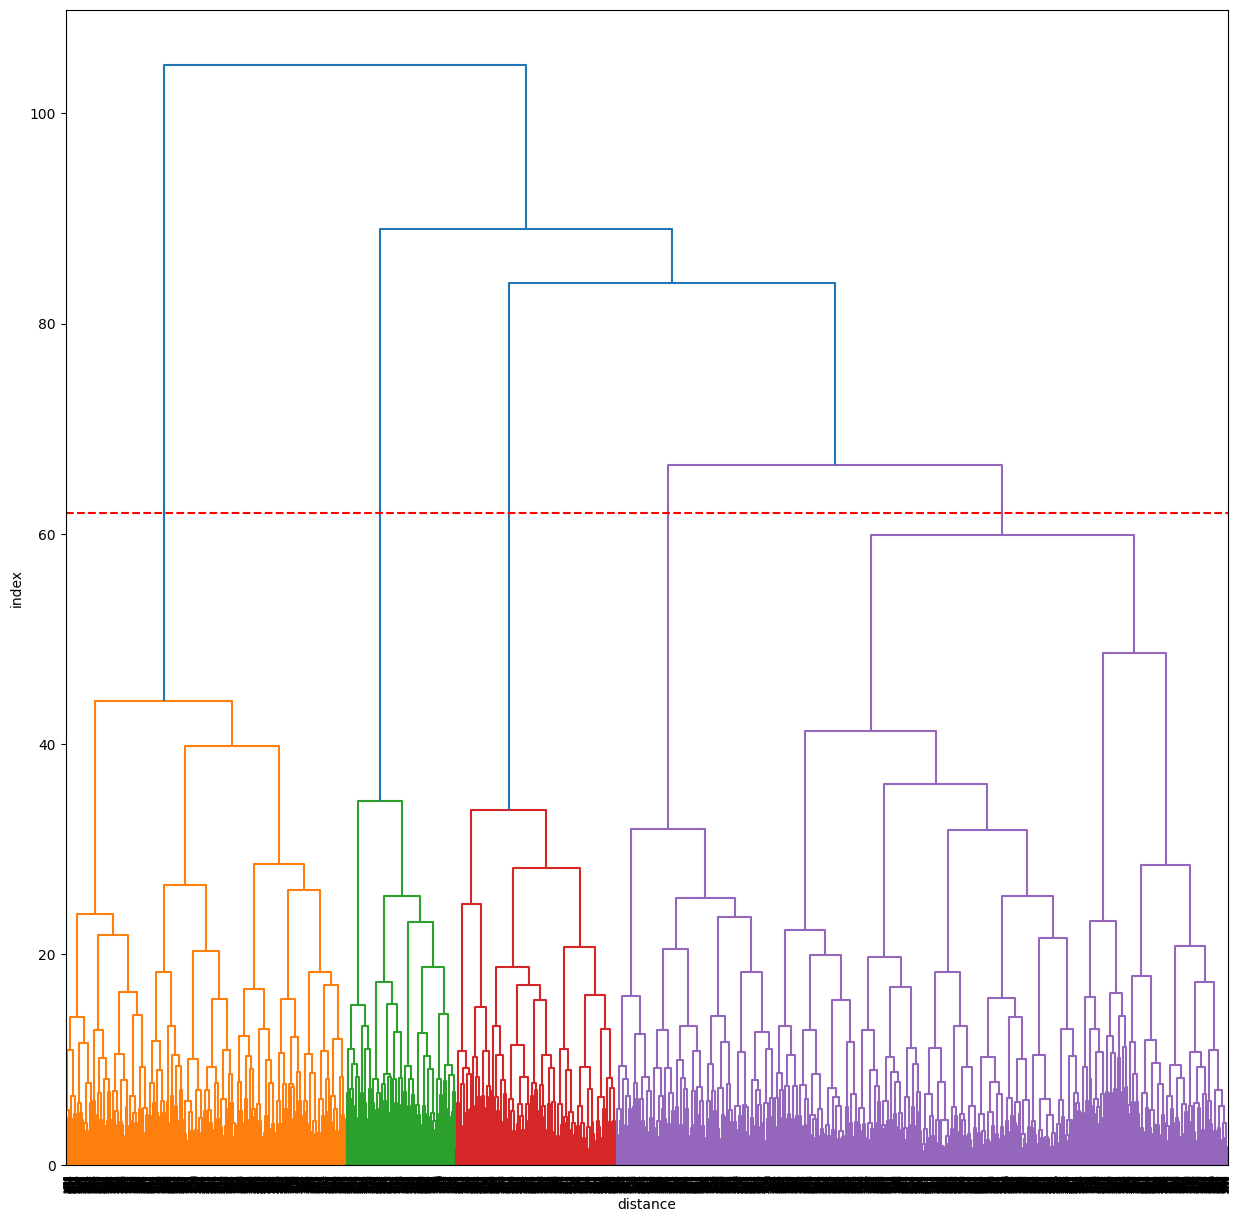

In [20]:
# Membuat grafik dendrogram
plt.figure(figsize=(15,15))
dendrogram(linkage_matrix)
plt.xlabel('distance')
plt.ylabel('index')

# Membuat garis merah
plt.axhline(y=62, color='r', linestyle='--')

plt.show()

Dengan memotong grafik dendrogram pada index 62, kita memiliki 5 klaster. 

**Melatih model pengklasteran dengan algoritma K-means**

In [21]:
# Model K-means dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)

# Melatih data training dengan K-means
kmeans.fit(X_st)

# Menambahkan klaster pada data
df['cluster'] = kmeans.labels_

# Menghitung rata-rata fitur tiap klaster
feature_mean = df.drop(columns='churn').groupby('cluster').mean()

feature_mean

C:\Users\vidop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster,,,,,,,,,,,,,
0,0.495413,0.000000,0.466055,0.077064,0.915596,2.227523,0.214679,28.484404,133.862709,2.091743,2.788991,1.656393,1.465891
1,0.585938,0.971354,0.260417,0.092448,0.903646,2.813802,0.477865,30.144531,162.010722,2.589844,5.132812,2.883403,2.884764
2,0.484424,0.998442,0.822430,1.000000,0.900312,3.155763,0.454829,29.218069,141.203442,2.919003,3.705607,1.734352,1.627826
3,0.500534,0.945571,0.741729,0.486660,0.899680,11.871932,0.552828,29.933831,164.763165,10.865528,4.695838,2.001331,1.992684
4,0.488267,1.000000,0.243682,0.020758,0.902527,1.985560,0.320397,28.209386,131.191160,1.901625,2.398917,1.272734,1.030315


Agar lebih mudah membandingkan nilai rata-rata fitur klaster dibuatkan grafik heatmap.

<Axes: xlabel='cluster'>

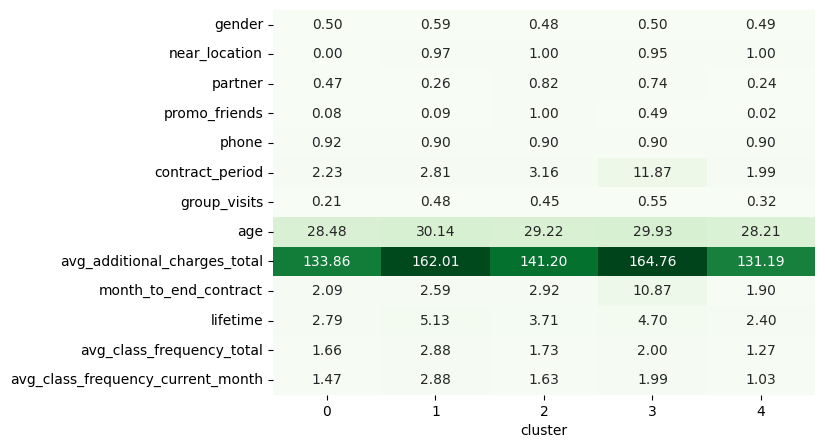

In [22]:
# Grafik heatmap
plt.figure(figsize=(7,5))
sns.heatmap(feature_mean.T, cmap='Greens', annot=True, fmt='.2f', cbar=False)

**Berdasarkan nilai rata-rata fitur klaster algoritme K-Means :**

 1. `gender` : jenis kelamin penggun tiap klaster tersebar secara merata, tidak terdapat perbedaan signifikan antar klaster.
 2. `near_location`: klaster 0 (0) memiliki semua pengguna dengan lokasi jauh sedangkan klaster 4 dan 2 (1) dengan lokasi dekat.
 3. `partner` : klaster 2 (0,82) memiliki pengguna karyawan perusahaan mitra terbanyak dan klaster 4 (0,24) paling sedikit.
 4. `promo_friends` : klaster 2 (1) semua pengguna yang bergabung melalui program promo friends dan klaster 4 (0,02) paling sedikit.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya tiap klaster.
 6. `contract_period` : klaster 3 (11,87) memiliki umur kontrak terpanjang dan klaster 4 (1,99) terpendek.
 7. `group_visits` : klaster 3 (0,55) memiliki pengguna yang mengambil sesi kelompok paling banyak dan klaster 0 (0,21) paling sedikit.
 8. `age` : klaster 1 (30,14) memiliki rata-rata usia pengguna yang lebih tinggi dan klaster 4 (28,21) paling rendah.
 9. `avg_additional_charges_total` : klaster 3 (164,76) memiliki biaya tambahan paling tinggi dan klaster 4 (131,19) paling rendah.
 10. `month_to_end_contract` : klaster 3 (10,87) memiliki sisa umur kontrak paling panjang dan klaster 4 (1,9) terpendek.
 11. `lifetime` : klaster 1 (5,13) memiliki pengguna yang berlanganan paling lama dan klaster 4 (2,4) lebih singkat.
 12. `avg_class_frequency_total` : klaster 1 (2,88) memiliki frekuensi mingguan tertinggi dan klaster 4 (1,27) terendah.
 13. `avg_class_frequency_current_month` : klaster 1 (2,88) memiliki frekuensi mingguan di bulan berjalan tertinggi dan klaster 4 (1,03) terendah.


In [23]:
# Membuat fungsi grafik histogram distribusi fitur kluster
def distribution(cluster) :
    data = df.query('cluster == @cluster')
    data = data.drop(columns=['cluster', 'churn'])
    data.hist(figsize=(15,10))


Membuat fungsi untuk menampilkan grafik histogram karena akan dilakukan berulang tiap klaster.

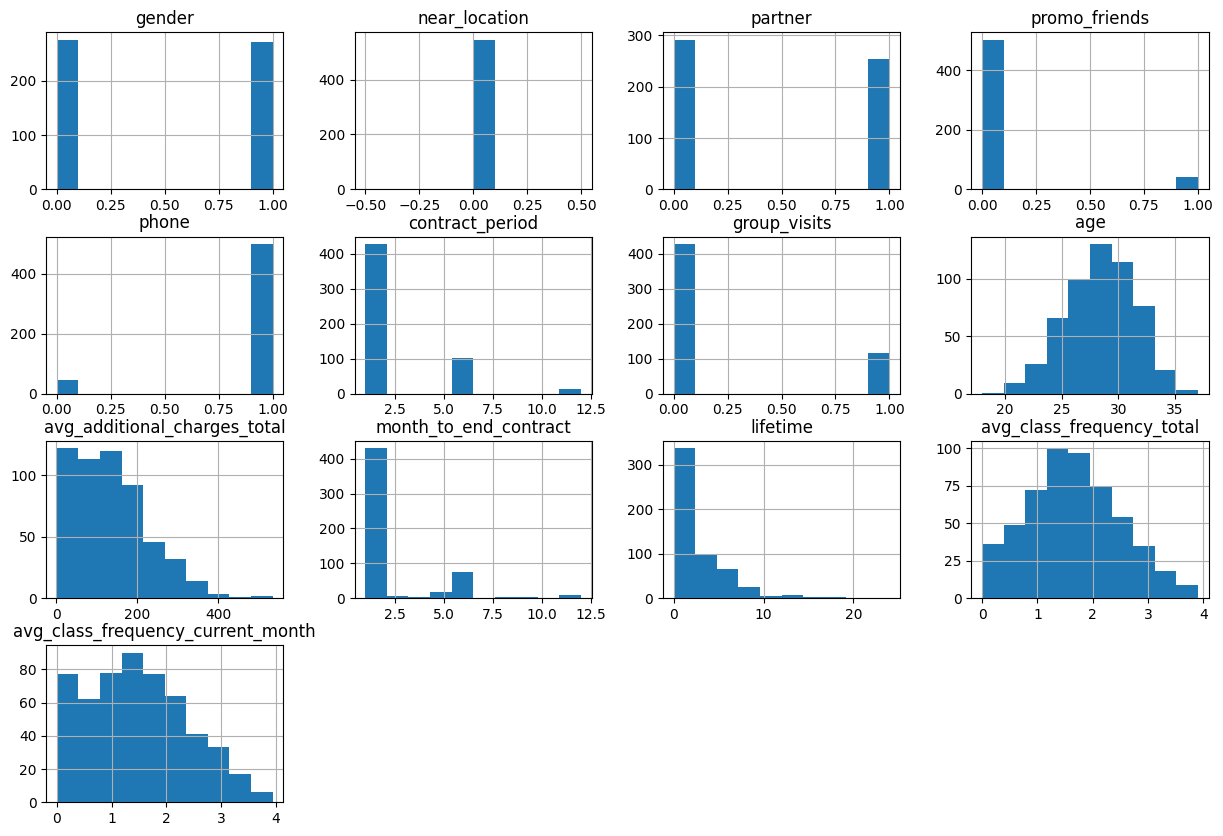

In [24]:
# Distribusi klaster 0
distribution(0)

**Distribusi fitur klaster 0 :**

 1. `gender` : jenis kelamin pengguna tersebar secara merata.
 2. `near_location`: semua pengguna dengan lokasi jauh.
 3. `partner` : pengguna karyawan perusahaan mitra lebih sedikit dengan bukan karyawan perusahaan mitra
 4. `promo_friends` : pengguna yang bergabung tidak melalui program promo friends lebih banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok paling banyak.
 8. `age` : usia pengguna paling banyak pada rentang 26-33 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-200.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan paling lama 1 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-2 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 0-2 kali.


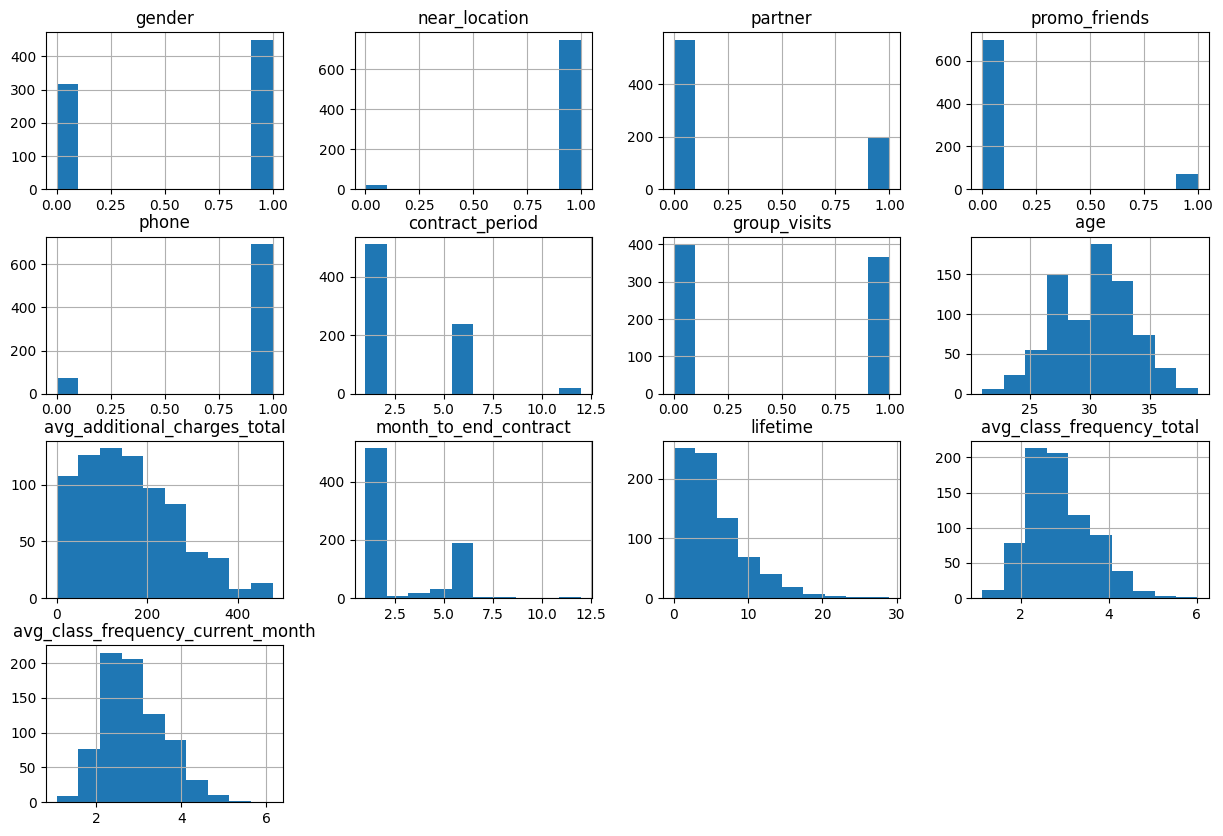

In [25]:
# Distribusi klaster 1
distribution(1)

**Distribusi fitur klaster 1 :**

 1. `gender` : jenis kelamin pengguna laki-laki sedikit lebih tinggi.
 2. `near_location`: sebagian besar pengguna berlokasi dekat.
 3. `partner` : pengguna karyawan bukan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tidak melalui program promo friends lebih banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 dan 6 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok lebih tinggi, namun perbedaanya tidak banyak.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 30-33 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-300.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 dan 6 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 2-3 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 2-3 kali.


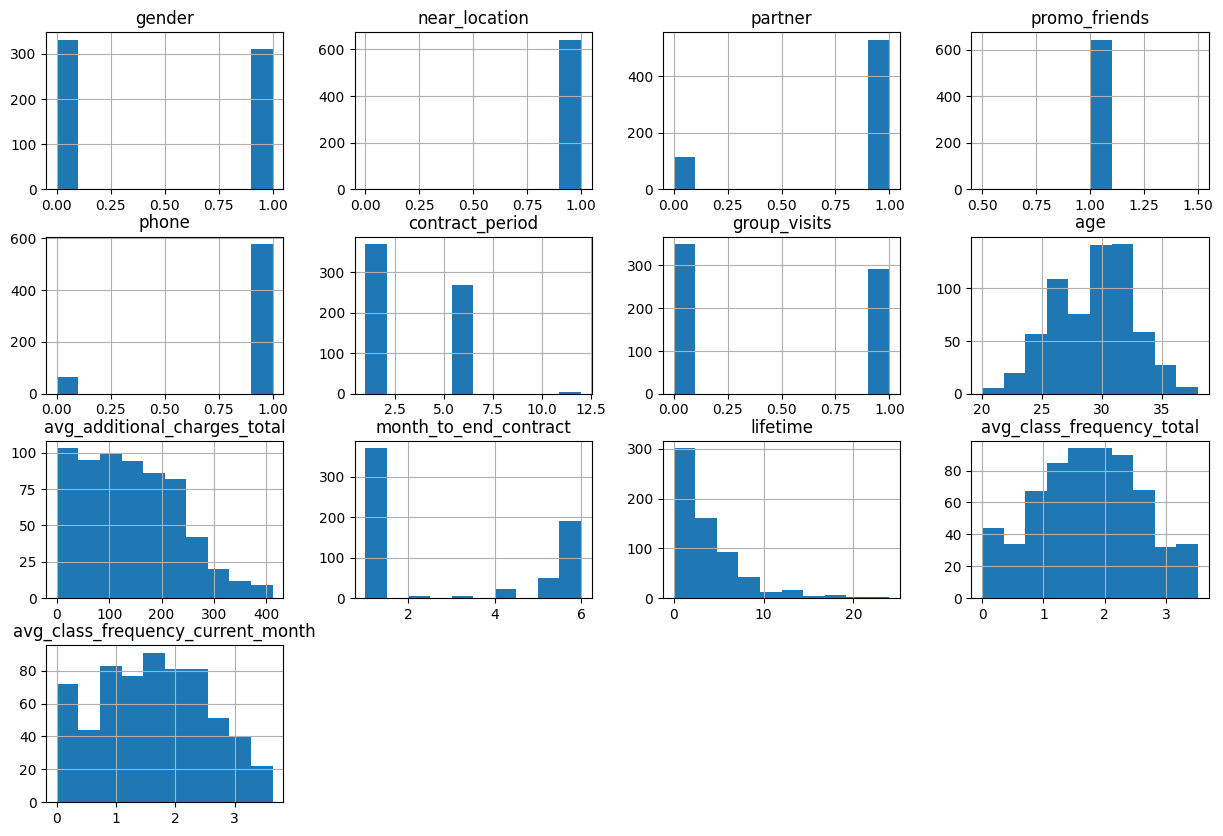

In [26]:
# Distribusi klaster 2
distribution(2)

**Distribusi fitur klaster 2 :**

 1. `gender` : jenis kelamin pengguna perempuan sedikit lebih tinggi.
 2. `near_location`: semua pengguna berlokasi dekat.
 3. `partner` : pengguna karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : semua pengguna bergabung melalui program promo friends.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 dan 6 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok lebih tinggi, namun perbedaanya tidak banyak.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 29-32 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-280.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 dan 6 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-2,8 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 1-2,5 kali.


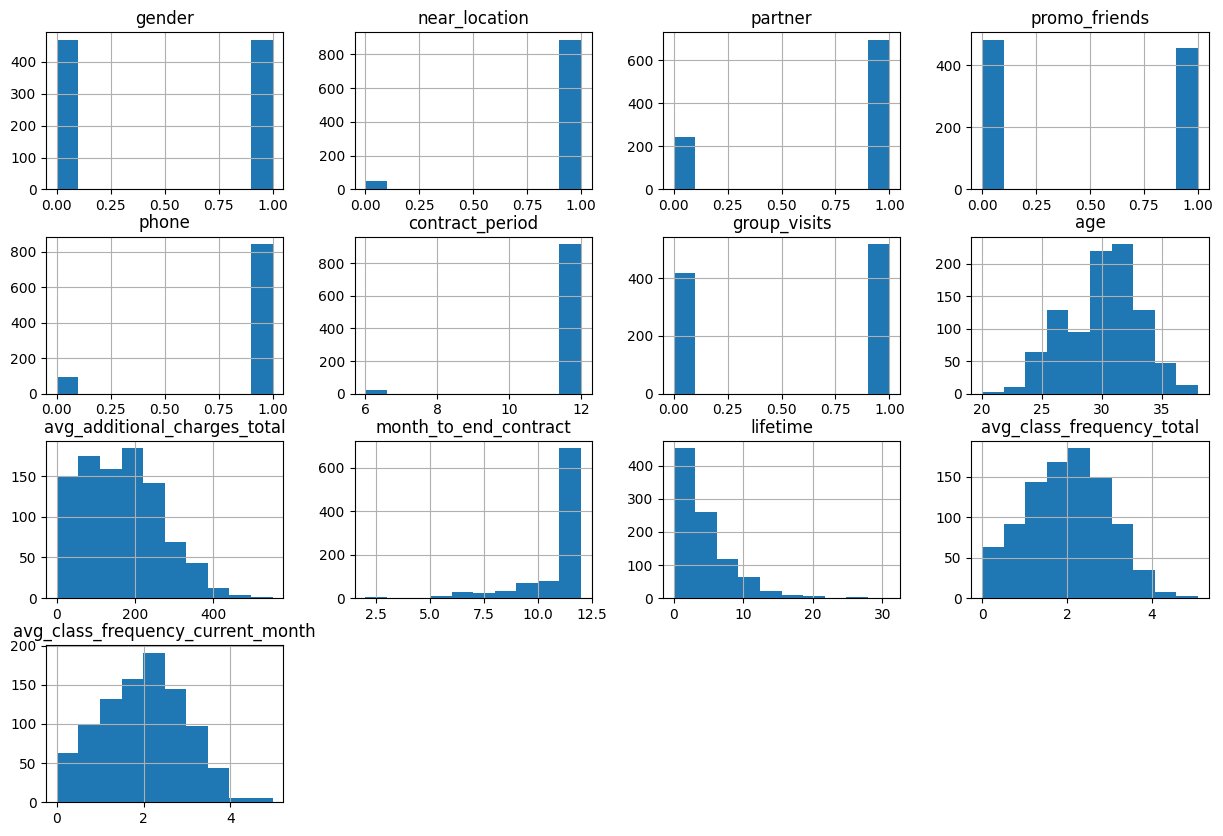

In [27]:
# Distribusi klaster 3
distribution(3)

**Distribusi fitur klaster 3 :**

 1. `gender` : jenis kelamin pengguna tersebar merata.
 2. `near_location`: pengguna berlokasi dekat lebih banyak.
 3. `partner` : pengguna karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna bergabung tidak melalui program promo friends lebih tinggi namun perbedaanya tidak banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 12 bulan paling banyak.
 7. `group_visits` : pengguna yang mengambil sesi kelompok lebih tinggi, namun perbedaanya tidak banyak.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 29-34 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-300.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 12 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-3 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 1-3 kali.


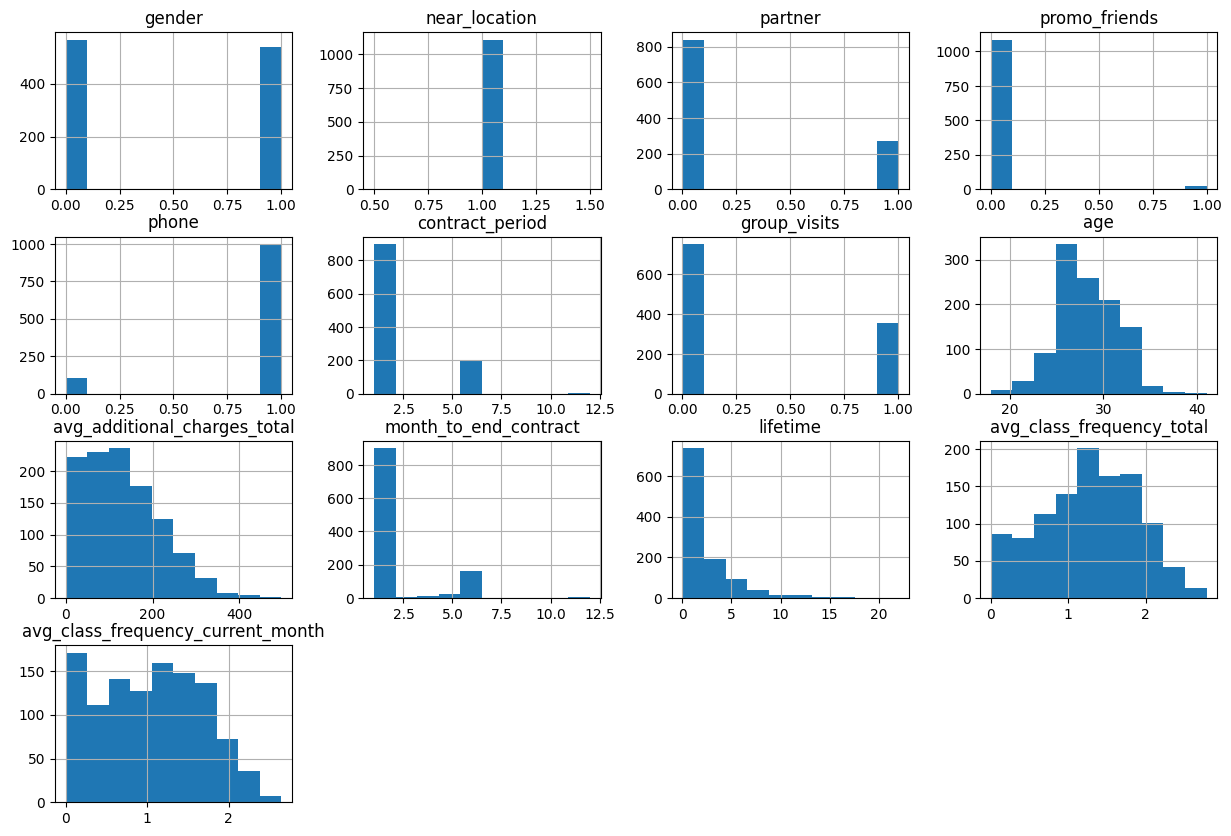

In [28]:
# Distribusi klaster 4
distribution(4)

**Distribusi fitur klaster 4 :**

 1. `gender` : jenis kelamin pengguna perempuan sedikit lebih tinggi.
 2. `near_location`: semua pengguna berlokasi dekat.
 3. `partner` : pengguna bukan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna bergabung tidak melalui program promo friends lebih banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok lebih tinggi.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 26-33 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-190.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 0-1 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-2 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 0-1,8 kali.


**Nilai rata-rata churn tiap klaster**

In [29]:
# Membuat nilai rata-rata tiap klaster
cluster_mean = df.groupby('cluster').mean()

# Nilai rata-rata churn tiap klaster
churn_mean = cluster_mean['churn']

# Mengurutkan nilai churn dari terkecil
churn_mean.sort_values()

cluster
3    0.022412
1    0.069010
2    0.247664
0    0.449541
4    0.526173
Name: churn, dtype: float64

Dengan melihat nilai rata-rata churn tiap klaster dapat diketahui :

 1. Klaster 3 dengan skor 0,02 memiliki kemungkinan terkecil pengguna untuk berhenti, sekitar 2% pengguna berhenti.
 2. Klaster 4 dengan skor 0,52 memiliki kemungkinan terbesar pengguna untuk berhenti, sekitar 52% pengguna berhenti.

# Kesimpulan

Secara keseluruhan data memiliki 14 kolom dan 4.000 baris.

Tidak terdapat nilai yang hilang dan duplikat eksplisit dalam data.

**Informasi yang terdapat dalam data :**

 1. `gender` — Jenis kelamin pengguna. 0 = perempuan, 1 = laki-laki.
 2. `near_location` — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran. 0 = jauh, 1 = dekat.
 3. `partner` — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka). 0 = bukan mitra, 1 = mitra.
 4. `promo_friends` — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka). 0 = tidak, 1 = ya.
 5. `phone` — apakah pengguna memberikan nomor telepon mereka. 0 = tidak, 1 = ya.
 6. `contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 12 bulan (1 tahun).
 7. `group_visits` — apakah pengguna mengambil bagian dalam sesi kelompok. 0 = tidak, 1 = ya.
 8. `age` — Umur pengguna.
 9. `avg_additional_charges_total` — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.
 10. `month_to_end_contract` — sisa bulan sebelum kontrak berakhir.
 11. `lifetime` — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran.
 12. `avg_class_frequency_total` — frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan.
 13. `avg_class_frequency_current_month` — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan.
 14. `churn` — churn aktual untuk bulan terkait. 0 = tinggal, 1 = keluar.
 
**Perbaikan yang dilakukan pada data :**

 1. Merubah nama kolom menjadi lowercase.




 **Pada tahap Exploratory Data Analysis (EDA) didapatkan informasi sebagai berikut :**
 
 **Nilai rata-rata dan standar deviasi secara keseluruhan menunjukan :**
 
 1. `gender` ;
    1. mean (0,51) : 51% pengguna berjenis kelamin laki-laki dan 49% perempuan.
    2. std (0,50) : gender terdistribusi dengan merata.
 2. `near_location` ;
    1. mean (0,84) : 84% pengguna berlokasi dekat dengan pusat kebugaran.
    2. std (0,36) : terdapat variabilitas, namun kebanyakan pengguna berlokasi dekat.
 3. `partner` ;
    1. mean (0,48) : 48% pengguna merupakan karyawan perusahaan mitra.
    2. std (0,50) : jumlah pengguna karyawan perusahaan mitra terdistribusi dengan merata.
 4. `promo_friends` ;
    1. mean (0,31) : 31% pengguna bergabung melalui program ajak teman.
    2. std (0,46) : terdapat variabilitas pada jumlah pengguna dengan program promo friends.
 5. `phone` ;
    1. mean (0,90) : 90% pengguna memberikan nomor telepon nya.
    2. std (0,29) : terdapat sedikit variabilitas, sebagian besar pengguna memberikan nomor telepon nya.
 6. `contract_period` ;
    1. mean (4,68) : rata-rata masa kontrak pengguna 4,68 bulan.
    2. std (4,55) : terdapat variabilitas pada masa kontrak.
 7. `group_visits` ;
    1. mean (0,41) : 41% pengguna mengambil sesi kelompok.
    2. std (0,49) : terdapat variabilitas pada jumlah pengguna yang mengambil sesi kelompok.
 8. `age` ;
    1. mean (29,18) : rata-rata umur pengguna 29 tahun.
    2. std (3,25) : terdapat variabilitas pada umur pengguna.
 9. `avg_additional_charges_total` ;
    1. mean (146,94) : rata-rata biaya tambahan diluar biaya berlangganan pengguna sebesar 146,94.
    2. std (96,35) : terdapat variabilitas yang cukup tinggi pada biaya tambahan pengguna.
 10. `month_to_end_contract`;
     1. mean (4,32) : rata-rata umur sisa kontrak pengguna 4,32 bulan.
     2. std (4,19) : terdapat variabilitas pada umur sisa kontrak pengguna.
 11. `lifetime` ;
     1. mean (3,72) : rata-rata waktu kunjungan pengguna 3,72 bulan.
     2. std (3,74) : terdapat variabilitas pada waktu kunjungan pengguna.
 12. `avg_class_frequency_total` ;
     1. mean (1,87) : rata-rata kunjungan per minggu pengguna 1,87 kali.
     2. std (0,97) : terdapat variabilitas pada kunjungan per minggu pengguna.
 13. `avg_class_frequency_current_month` ;
     1. mean (1,76) : rata-rata kunjungan per bulan pengguna 1,76 kali.
     2. std (1,05) : terdapat variabilitas pada kunjungan per bulan pengguna.
 14. `churn` :
     1. mean (0,26) :  26% pengguna keluar dari program.
     2. std (0,44) : terdapat variabilitas pada churn.

**Perbandingan nilai rata-rata kelompok churn yang bertahan (0) dan keluar (1) :**
 
 1. `age` : rata-rata umur pengguna yang keluar lebih rendah.
 2. `avg_additional_charges_total` : rata-rata biaya tambahan pengguna yang keluar lebih rendah.
 3. `avg_class_frequency_current_month` : rata-rata kunjungan per bulan pengguna yang keluar lebih rendah.
 4. `avg_class_frequency_total` : rata-rata kunjungan per minggu pengguna yang keluar lebih rendah.
 5. `contract_period` : rata-rata umur kontrak pengguna yang keluar lebih singkat.
 6. `gender` : tidak terdapat perbedaan yang signifikan pada proporsi jenis kelamin pengguna.
 7. `group_visits` : pengguna yang keluar mengambil lebih sedikit sesi kelompok.
 8. `lifetime` : rata-rata kunjungan pengguna yang keluar lebih singkat.
 9. `month_to_end_contract` : rata-rata waktu sisa kontrak pengguna yang keluar lebih rendah.
 10. `near_location` : rata-rata lokasi pengguna yang keluar lebih jauh.
 11. `partner` : rata-rata pengguna merupakan karyawan perusahaan mitra lebih sedikit.
 12. `phone` : tidak terdapat perbedaan yang signifikan pada proporsi pengguna memberikan nomor telepon nya.
 13. `promo_friends` : rata-rata pengguna bergabung dengan program promo friends yang keluar lebih sedikit.
 
 

**Distribusi data pada kelompok yang bertahan (churn = 0) :**

 1. `gender` : jenis kelamin lebih banyak laki-laki, namun perbedaanya tidak signifikan.
 2. `near_location` : pengguna dengan lokasi yang dekat lebih banyak.
 3. `partner` : pengguna yang merupakan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tanpa program promo friends lebih banyak.
 5. `phone` : pengguna yang memberikan nomor teleponya lebih banyak.
 6. `contract_period` : kebanyakan usia kontrak pengguna 1 dan 12 bulan. 
 7. `group_visits` : kebanyakan pengguna tidak mengambil sesi kelompok.
 8. `age` : kebanyakan usia pengguna 26 - 33 tahun.
 9. `avg_additional_charges_total` : biaya tambahan yang dibelanjakan oleh pengguna pada rentang 0-200.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 dan 12 bulan.
 11. `lifetime` : kebanyakan waktu kunjungan pengguna 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan pengguna berkunjung 1 - 3 kali per minggu.
 13. `avg_class_frequency_current_month` : kebanyakan pengguna berkunjung 1 - 3 kali per bulan.

**Distribusi data pada kelompok yang keluar (churn = 1) :**

 1. `gender` : jenis kelamin lebih banyak laki-laki, namun perbedaanya tidak signifikan.
 2. `near_location` : pengguna dengan lokasi yang dekat lebih banyak.
 3. `partner` : pengguna yang bukan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tanpa program promo friends lebih banyak.
 5. `phone` : pengguna yang memberikan nomor teleponya lebih banyak.
 6. `contract_period` : usia kontrak pengguna 1 bulan paling banyak. 
 7. `group_visits` : kebanyakan pengguna tidak mengambil sesi kelompok.
 8. `age` : kebanyakan usia pengguna 25 - 29 tahun.
 9. `avg_additional_charges_total` : biaya tambahan yang dibelanjakan oleh pengguna pada rentang 0-100 
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 bulan.
 11. `lifetime` : kebanyakan waktu kunjungan pengguna 0-1 bulan.
 12. `avg_class_frequency_total` : kebanyakan pengguna berkunjung 1 - 2 kali per minggu.
 13. `avg_class_frequency_current_month` : kebanyakan pengguna berkunjung 1 - 1,5 kali per bulan.
 

**Fitur yang berkorelasi terhadap `churn` :**

 1. `lifetime` (-0,44) : pengguna yang menjadi anggota lebih lama memiliki kemungkinan lebih kecil untuk keluar.
 2. `avg_class_frequency_current_month` (-0,41) dan `avg_class_frequency_total` (-0,25) : pengguna yang lebih sering berkunjung memiliki kemungkinan lebih kecil untuk keluar.
 3. `age` (-0,40) : pengguna yang lebih tua memiliki kemungkinan lebih kecil untuk keluar.
 4. `contract_period` (-0,39) dan `month_to_end_contract` (-0,38) : pengguna yang memiliki umur kontrak dan sisa umur kontrak yang panjang memiliki kemungkinan lebih kecil untuk keluar.
 5. `avg_additional_charges_total` (-0,20) : pengguna yang mengeluarkan lebih banyak biaya tambahan memiliki kemungkinan lebih kecil untuk keluar.


**Dalam menentukan model untuk memprediksi churn pengguna :**

Data dibagi menjadi train_set (80%) dan validation_set (20%), persentase ini diambil berdasarkan praktek umum analisa data. Dan akan dilatih dengan dua model yaitu, logistic regression dan random forrest classifier.

Skor validasi dari kedua model ini :

LogisticRegression(max_iter=1000, random_state=0)

    Accuracy: 0.92
	Precision: 0.86
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97

RandomForestClassifier(random_state=0)
	
    Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97

Pada kedua model machine learning memiliki skor Accuracy dan ROC_AUC yang sama. Tetapi model Logistic Regression memiliki skor Precision, Recall dan F1 sedikit lebih tinggi dari Random Forrest Classifier. Berdasarkan dengan skor ini, model Logistic Regression bekerja sedikit lebih baik dari Random Forest Classifier.

**Menentukan jumlah klaster pengguna dengan grafik dendrogram :**

Dengan menerapkan standardisasi menggunakan metode 'StandardScaler()' pada data fitur dan membuat matriks jarak menggunakan 'linkage()' akan digunakan untuk membuat grafik dendrogram yang membantu dalam memperkirakan jumlah klaster. Diketahui bahwa dengan memotong grafik dendrogram pada index 62, data memiliki 5 klaster.

**Setelah dilakukan pengklasteran data menggunakan algoritma k-means dengan 5 jumlah klaster diketahui bahwa :**

**Berdasarkan perbandingan nilai rata-rata fitur klaster :**

 1. `gender` : jenis kelamin penggun tiap klaster tersebar secara merata, tidak terdapat perbedaan signifikan antar klaster.
 2. `near_location`: klaster 0 (0) memiliki semua pengguna dengan lokasi jauh sedangkan klaster 4 dan 2 (1) dengan lokasi dekat.
 3. `partner` : klaster 2 (0,82) memiliki pengguna karyawan perusahaan mitra terbanyak dan klaster 4 (0,24) paling sedikit.
 4. `promo_friends` : klaster 2 (1) semua pengguna yang bergabung melalui program promo friends dan klaster 4 (0,02) paling sedikit.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya tiap klaster.
 6. `contract_period` : klaster 3 (11,87) memiliki umur kontrak terpanjang dan klaster 4 (1,99) terpendek.
 7. `group_visits` : klaster 3 (0,55) memiliki pengguna yang mengambil sesi kelompok paling banyak dan klaster 0 (0,21) paling sedikit.
 8. `age` : klaster 1 (30,14) memiliki rata-rata usia pengguna yang lebih tinggi dan klaster 4 (28,21) paling rendah.
 9. `avg_additional_charges_total` : klaster 3 (164,76) memiliki biaya tambahan paling tinggi dan klaster 4 (131,19) paling rendah.
 10. `month_to_end_contract` : klaster 3 (10,87) memiliki sisa umur kontrak paling panjang dan klaster 4 (1,9) terpendek.
 11. `lifetime` : klaster 1 (5,13) memiliki pengguna yang berlanganan paling lama dan klaster 4 (2,4) lebih singkat.
 12. `avg_class_frequency_total` : klaster 1 (2,88) memiliki frekuensi mingguan tertinggi dan klaster 4 (1,27) terendah.
 13. `avg_class_frequency_current_month` : klaster 1 (2,88) memiliki frekuensi mingguan di bulan berjalan tertinggi dan klaster 4 (1,03) terendah.


**Distribusi fitur klaster 0 :**

 1. `gender` : jenis kelamin pengguna tersebar secara merata.
 2. `near_location`: semua pengguna dengan lokasi jauh.
 3. `partner` : pengguna karyawan perusahaan mitra lebih sedikit dengan bukan karyawan perusahaan mitra
 4. `promo_friends` : pengguna yang bergabung tidak melalui program promo friends lebih banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok paling banyak.
 8. `age` : usia pengguna paling banyak pada rentang 26-33 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-200.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan paling lama 1 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-2 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 0-2 kali.


**Distribusi fitur klaster 1 :**

 1. `gender` : jenis kelamin pengguna laki-laki sedikit lebih tinggi.
 2. `near_location`: sebagian besar pengguna berlokasi dekat.
 3. `partner` : pengguna karyawan bukan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna yang bergabung tidak melalui program promo friends lebih banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 dan 6 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok lebih tinggi, namun perbedaanya tidak banyak.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 30-33 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-300.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 dan 6 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 2-3 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 2-3 kali.


**Distribusi fitur klaster 2 :**

 1. `gender` : jenis kelamin pengguna perempuan sedikit lebih tinggi.
 2. `near_location`: semua pengguna berlokasi dekat.
 3. `partner` : pengguna karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : semua pengguna bergabung melalui program promo friends.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 dan 6 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok lebih tinggi, namun perbedaanya tidak banyak.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 29-32 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-280.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 dan 6 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-2,8 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 1-2,5 kali.


**Distribusi fitur klaster 3 :**

 1. `gender` : jenis kelamin pengguna tersebar merata.
 2. `near_location`: pengguna berlokasi dekat lebih banyak.
 3. `partner` : pengguna karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna bergabung tidak melalui program promo friends lebih tinggi namun perbedaanya tidak banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 12 bulan paling banyak.
 7. `group_visits` : pengguna yang mengambil sesi kelompok lebih tinggi, namun perbedaanya tidak banyak.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 29-34 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-300.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 12 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 1-9 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-3 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 1-3 kali.


**Distribusi fitur klaster 4 :**

 1. `gender` : jenis kelamin pengguna perempuan sedikit lebih tinggi.
 2. `near_location`: semua pengguna berlokasi dekat.
 3. `partner` : pengguna bukan karyawan perusahaan mitra lebih banyak.
 4. `promo_friends` : pengguna bergabung tidak melalui program promo friends lebih banyak.
 5. `phone` : hampir semua pengguna memberikan nomor teleponnya.
 6. `contract_period` : kontrak dengan durasi 1 bulan paling banyak.
 7. `group_visits` : pengguna yang tidak mengambil sesi kelompok lebih tinggi.
 8. `age` : usia pengguna paling banyak pada umur 26 dan rentang umur 26-33 tahun. 
 9. `avg_additional_charges_total` : kebanyakan pengguna menghabiskan biaya tambahan pada rentang 0-190.
 10. `month_to_end_contract` : kebanyakan sisa umur kontrak pengguna 1 bulan.
 11. `lifetime` : kebanyakan waktu pengguna berlanganan pada rentang 0-1 bulan.
 12. `avg_class_frequency_total` : kebanyakan frekuensi mingguan pengguna di rentang 1-2 kali .
 13. `avg_class_frequency_current_month` :  kebanyakan frekuensi mingguan di bulan berjalan di rentang 0-1,8 kali.


**Dengan melihat nilai rata-rata churn tiap klaster dapat diketahui :**

 1. Klaster 3 dengan skor 0,02 memiliki kemungkinan terkecil pengguna untuk berhenti, sekitar 2% pengguna berhenti.
 2. Klaster 4 dengan skor 0,52 memiliki kemungkinan terbesar pengguna untuk berhenti, sekitar 52% pengguna berhenti.

**Strategi yang dapat direkomendasikan :**

 1. **Program loyalitas**, memberikan penghargaan kepada pengguna yang melakukan pembelian berulang dengan menawarkan poin, diskon, atau akses eksklusif untuk memberi insentif kepada pengguna.
 2. **Insentif progresif kontrak**, memberikan diskon atau insentif lain lebih besar kepada kontrak dengan masa yang lebih lama.
 3. **Keterlibatan pelanggan**, fokus untuk menciptakan dan menjaga pengalaman pelanggan tetap positif. Berinteraksi dengan pengguna, memahami kebutuhan pengguna dan mengatasi masalah mereka.